In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers.experimental import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os.path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = Path('/content/drive/MyDrive/Indian Food Images/Indian Food Images')
filepath = list(image.glob(r'**/*.jpg'))
label = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], filepath))
filepath = pd.Series(filepath, name = 'Filepath').astype(str)
label = pd.Series(label, name = 'Label')
imagedataset = pd.concat([filepath, label], axis = 1).sample(frac = 1.0, random_state = 1).reset_index(drop = True)

In [ ]:
imagedataset.head()

,Filepath,Label
0,/content/drive/MyDrive/Indian Food Images/Indi...,sutar_feni
1,/content/drive/MyDrive/Indian Food Images/Indi...,maach_jhol
2,/content/drive/MyDrive/Indian Food Images/Indi...,paneer_butter_masala
3,/content/drive/MyDrive/Indian Food Images/Indi...,jalebi
4,/content/drive/MyDrive/Indian Food Images/Indi...,naan


In [ ]:
label

0             sheera
1             sheera
2             sheera
3             sheera
4             sheera
            ...     
3995    bandar_laddu
3996    bandar_laddu
3997    bandar_laddu
3998    bandar_laddu
3999    bandar_laddu
Name: Label, Length: 4000, dtype: object

In [ ]:
len(list(imagedataset['Label'].unique()))

80

In [ ]:
train_df, test_df = train_test_split(imagedataset, test_size = 0.30, shuffle = True, random_state = 1)

In [ ]:
train_df.head()

,Filepath,Label
1850,/content/drive/MyDrive/Indian Food Images/Indi...,phirni
2293,/content/drive/MyDrive/Indian Food Images/Indi...,jalebi
576,/content/drive/MyDrive/Indian Food Images/Indi...,lyangcha
2731,/content/drive/MyDrive/Indian Food Images/Indi...,poha
1051,/content/drive/MyDrive/Indian Food Images/Indi...,chicken_razala


In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,validation_split = 0.2)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_image = train_gen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Filepath',
                                           y_col = 'Label',
                                           target_size = (256,256),
                                           batch_size = 64,
                                           class_mode = 'categorical',
                                           shuffle = True,
                                           seed =2,
                                           subset = 'training')
val_image = train_gen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Filepath',
                                           y_col = 'Label',
                                           target_size = (256,256),
                                           batch_size = 64,
                                           class_mode = 'categorical',
                                           shuffle = True,
                                           seed = 82,
                                           subset = 'validation')
test_image = test_gen.flow_from_dataframe(dataframe = test_df,
                                           x_col = 'Filepath',
                                           y_col = 'Label',
                                           target_size = (256,256),
                                           batch_size = 64,
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 2240 validated image filenames belonging to 80 classes.
Found 560 validated image filenames belonging to 80 classes.
Found 1200 validated image filenames belonging to 80 classes.


In [ ]:
# dataset=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Indian Food Images/Indian Food Images")

In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation='linear'))
model.summary()
model.compile(optimizer=RMSprop(lr=0.05),
              loss="categorical_crossentropy",
              metrics=['accuracy']
              )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [ ]:
# inputs = tf.keras.Input(shape = (256,256,3))
# x = tf.keras.layers.Conv2D(16, kernel_size =(3,3), activation = 'relu' )(inputs)
# x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Conv2D(32, kernel_size =(3,3), activation = 'relu' )(x)
# x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(64, activation = 'relu')(x)
# x = tf.keras.layers.Dense(64, activation = 'relu')(x)
# outputs = tf.keras.layers.Dense(1, activation = 'linear')(x)
# model = tf.keras.Model(inputs = inputs, outputs = outputs)
# model.compile(optimizer = 'adam',
#              loss = 'mse',
#              metrics = ['accuracy'])
# history  = model.fit(train_image,
#                     validation_data = val_image,
#                     epochs = 10,
#                     callbacks = [tf.keras.callbacks.EarlyStopping(
#                     monitor = 'val_loss',
#                     patience = 5,
#                     restore_best_weights = True)])

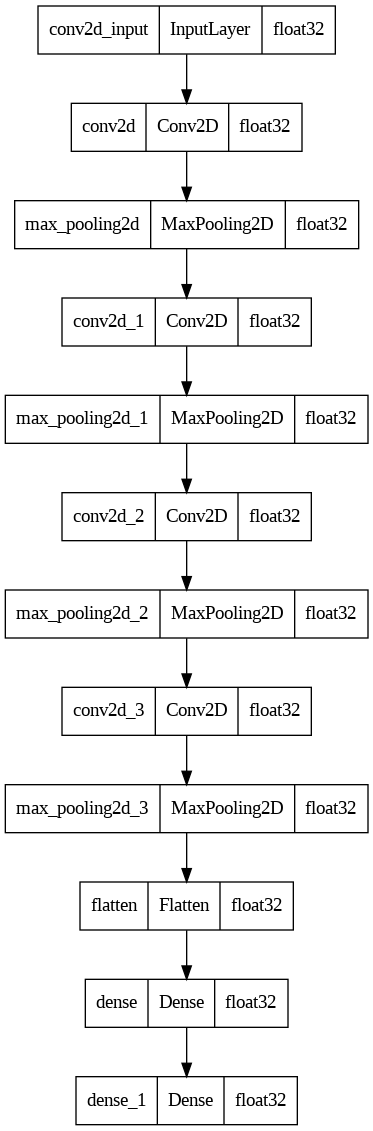

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

In [ ]:
history=model.fit(train_image,epochs=3,steps_per_epoch=10,validation_data=val_image)
model.save("model.h5")

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 353s 35s/step - loss: 1.1921e-07 - accuracy: 0.9768 - val_loss: 1.1921e-07 - val_accuracy: 0.9805
Epoch 2/3
10/10 [==============================] - 354s 36s/step - loss: 1.1921e-07 - accuracy: 0.9829 - val_loss: 1.1921e-07 - val_accuracy: 0.9805
Epoch 3/3
10/10 [==============================] - 365s 38s/step - loss: 1.1921e-07 - accuracy: 0.9814 - val_loss: 1.1921e-07 - val_accuracy: 0.9805


In [ ]:
result = model.evaluate(test_image, verbose = 0)
print('Test Loss : {:.3f}'.format(result[0]))
print('Test Accuracy : {:.3f}%'.format(result[1]*100))

In [ ]:
import numpy as np
from google.colab import files 
from tensorflow.keras.preprocessing import image
model=tf.keras.models.load_model("/content/model.h5")
uploaded=files.upload()
for fn  in uploaded.keys():
  path="/content"+"/"+fn
  img=image.load_img(path,target_size=(256,256))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=1)
  print(classes)

Saving val_002464.jpg to val_002464.jpg
1/1 [==============================] - 0s 215ms/step
[[60.720978]]


In [ ]:
label[int(classes[0])]

'unni_appam'

In [ ]:
data.tail()

,food item,protein,fat,carbohydrates,sugar,calories
279,clam_food,13.0,5.0,27.0,3.0,210
280,burrito,7.0,17.0,44.0,3.0,258
281,roulade,18.0,8.0,3.0,5.0,96
282,lobster_bisque,16.0,6.0,9.0,3.0,219
283,unni_appam,10.0,1.0,20.0,4.0,21


In [ ]:
data=pd.DataFrame(pd.read_csv("/content/nutrients1.csv"))

In [ ]:
dataset=pd.DataFrame(data["food item"])

In [ ]:
data['food item'].loc[data.index[int(classes[0])]]

'macaron'

In [ ]:
import pickle
pickle.dump(model,open("model.pkl","wb"))
model.save("saved_model/my_model")

In [ ]:
!pip install tensorflowjs
!pip install --upgrade jaxlib==0.4.7
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /content/saved_model/my_model \
    /content/saved_model/web_model
!zip -r folder_name.zip /content/saved_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439691 sha256=f3f396404075117e106bd857808e0ae33c2433ea39c617dbd607746c86bd4d1b
  Stored in directory: /root/.cache/pip/wheels/09/6f/35/a8fac8b61de8e0d9eb07988481528898561923e260b1fa7d2f
Successfully built jax
  Attemp

2023-05-07 02:07:42.700349: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 92%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/fingerprint.pb (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 63%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 54%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 88%)
  adding: content/saved_model/web_model/ (stored 0%)
  adding: content/saved_model/web_model/group1-shard1of2.bin (deflated 8%)
  adding: content/saved_model/web_model/model.json (deflated 88%)
  adding: content/saved_model/web_model/group1-shard2of2.bin (deflated 8%)


In [ ]:
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3


2023-05-07 02:09:23.510894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
usage: convert.py
       [-h]
       [--input INPUT]
       [--graphdef GRAPHDEF]
       [--saved-model SAVED_MODEL]
       [--tag TAG]
       [--signature_def SIGNATURE_DEF]
       [--concrete_function CONCRETE_FUNCTION]
       [--checkpoint CHECKPOINT]
       [--keras KERAS]
       [--tflite TFLITE]
       [--tfjs TFJS]
       [--large_model]
       [--output OUTPUT]
       [--inputs INPUTS]
       [--outputs OUTPUTS]
       [--ignore_default IGNORE_DEFAULT]
       [--use_default USE_DEFAULT]
       [--rename-inputs RENAME_INPUTS]
       [--rename-outputs RENAME_OUTPUTS]
       [--use-graph-names]
       [--opset OPSET]
      

In [ ]:
import tf2onnx 
!python -m tf2onnx.convert --saved-model "/content/saved_model/my_model/saved_model.pb" --output saved_model.onnx

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-05-07 02:15:43,803 - WARNING - '--tag' not specified for saved_model. Using --tag serve
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/tf2onnx/convert.py", line 710, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/tf2onnx/convert.py", line 242, in main
    graph_def, inputs, outputs, initialized_tables, tensors_to_rename = tf_loader.from_saved_model(
  File "/usr/local/lib/python3.10/dist-packages/tf2onnx/tf_loader.py", line 611, in from_saved_model
    _from_saved_model_v2(model_pat

In [ ]:
import tf2onnx 
!python -m tf2onnx.convert --saved-model "/content/saved_model/my_model" --output saved_model.onnx

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-05-07 02:17:48,498 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2023-05-07 02:17:49,061 - INFO - Signatures found in model: [serving_default].
2023-05-07 02:17:49,061 - WARNING - '--signature_def' not specified, using first signature: serving_default
2023-05-07 02:17:49,061 - INFO - Output names: ['dense_1']
2023-05-07 02:17:49,497 - INFO - Using tensorflow=2.12.0, onnx=1.14.0, tf2onnx=1.14.0/8f8d49
2023-05-07 02:17:49,497 - INFO - Using opset <onnx, 15>
2023-05-07 02:17:49,535 - INFO - Computed 0 values for constant folding
2023-05-07 02:17:49,580 - INFO - Optimizing ONNX model
2023-05-07 02:17:49,655 - INFO - After optimization: Cast -1 (1->0), Identity -2 (2->0), Transpose -14 (16->2)
2023-05-07 02:17:49,666 - INFO - 


In [ ]:
!kaggle kernels output johnybhiduri/indian-food-image-classifier-cnn -p "/content/sample_data"


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
